In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

def Writer_Split(Matrix,Number_1,Number_2):
    if Number_2 != 0 :
        for i in range(Number_1):
            for j in range(Number_2):
                print("%.3f" % Matrix[i][j],end=" \t")
            print ("")
    else :
        for i in range (Number_1):
            print("%.3f" % Matrix[i],end="  ")
    return 0

def Lambda(lambda1,lambda2,x,y,delta1,delta2,w):
    for k in range(w):
        if ((k+1)*delta1+k*delta2<=x<=(k+1)*(delta1+delta2)) and (k*delta2<=y<=(k+1)*delta2):
            return lambda2
    return lambda1

#Исходные данные
#########################################################################################################
Number_group = 6
W_slices = 4
d_lambda = 55.0
d_dy_dx = [0.6,4.0]
Bio = [0.01,1,100]

lambda_1 = 1.0
lambda_2 = d_lambda*lambda_1
delta_1 = [1.0 for i in range(np.size(d_dy_dx))]
delta_2 = [0 for i in range(np.size(d_dy_dx))]
for i in range(np.size(d_dy_dx)):
    delta_2[i] =delta_1[i]*d_dy_dx[i]
#########################################################################################################

def Calculate_Matrix(W_number,delta1,delta2,lambda1,lambda2,Bio):
    Zero = 10e-20
    
    L_x = (W_number+1)*delta1 + W_number*delta2
    L_y = W_number*delta2
    
    if(delta1>delta2):
        dx=delta2/(W_number+1)
    else:
        dx=delta1/(W_number+1)
    dy=dx
    dz = 1.0
    Number_x_slices = int(L_x/dx)
    Number_y_slices = int(L_y/dy)
    
    #Координаты граней 
    XFace = np.linspace(0,L_x,Number_x_slices+1)
    YFace = np.linspace(0,L_y,Number_y_slices+1)
    
    #Площади соотвествующих граней по Х
    AFaceX = np.zeros((Number_y_slices+1,Number_x_slices+1),dtype=float)
    AFaceX[:] = dy*dz
    
    #Площади соотвествующих граней по Х
    AFaceY = np.zeros((Number_y_slices+1,Number_x_slices+1),dtype=float)
    AFaceY[:] = dx*dz
    
    #Координаты средних сечений контрольных объемов по Х
    XP = np.zeros(Number_x_slices)
    XP = (XFace[0:Number_x_slices]+XFace[1:Number_x_slices+1])/2.0
    #Координаты средних сечений контрольных объемов по Y
    YP = np.zeros(Number_y_slices)
    YP = (YFace[0:Number_y_slices]+YFace[1:Number_y_slices+1])/2.0
    
    #Oбъемы контрольных объемов
    VolumP = np.zeros((Number_y_slices,Number_x_slices),dtype = float)
    VolumP[:] = dx*dy*dz

    #Коэффициенты диффузии для контрольных объемов
    Gamma = np.zeros((Number_y_slices,Number_x_slices),dtype=float)           
    for i in range(Number_x_slices):
        for j in range(Number_y_slices):
            Gamma[j,i] = Lambda(lambda1,lambda2,XP[i],YP[j],delta1,delta2,W_number)
    #Writer_Split(Gamma,Number_y_slices,Number_x_slices)       
    #Коэффициенты проводимости для контрольных объемов
    #Ось X
    Alpha_X = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    Alpha_X = 2.0*Gamma/dx
    #Ось Y
    Alpha_Y = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    Alpha_Y = 2.0*Gamma/dy
    
    
    Alpha_W = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    for i in range(Number_y_slices):
        for j in range(Number_x_slices):
            if j == 0:
                Alpha_W[i,j] = Zero
            else:
                Alpha_W[i,j] = 2.0*Gamma[i,j-1]/dx
    Alpha_E = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    for i in range(Number_y_slices):
        for j in range(Number_x_slices):
            if j == Number_x_slices-1:
                Alpha_E[i,j] = Zero
            else:
                Alpha_E[i,j] = 2.0*Gamma[i,j+1]/dx 
    
    Alpha_N = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    for i in range(Number_y_slices):
        for j in range(Number_x_slices):
            if i == Number_y_slices-1:
                Alpha_N[i,j] = Zero
            else:
                Alpha_N[i,j] = 2.0*Gamma[i+1,j]/dy
    Alpha_S = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    for i in range(Number_y_slices):
        for j in range(Number_x_slices):
            if i == 0:
                Alpha_S[i,j] = Zero
            else:
                Alpha_S[i,j] = 2.0*Gamma[i-1,j]/dy
    
    #Коэффициенты AW AE AS AN для расчетной области
    #Коэффициенты AE 
    AE = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    for i in range(Number_y_slices):
        for j in range(Number_x_slices):
            if j==Number_x_slices-1:
                AE[i,j] = 0
            else:
                AE[i,j] = ((1/Alpha_X[i,j] + 1/Alpha_E[i,j])**-1) * AFaceX[i,j]
    #Коэффициенты AW
    AW = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    for i in range(Number_y_slices):
        for j in range(Number_x_slices):
            if j==0:
                AW[i,j] = 0
            else:
                AW[i,j] = ((1/Alpha_X[i,j] + 1/Alpha_W[i,j]) **-1) * AFaceX[i,j]
    #Коэффициенты AN
    AN = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    for i in range(Number_y_slices):
        for j in range(Number_x_slices):
            AN[i,j] = ((1/Alpha_Y[i,j] + 1/Alpha_N[i,j])** -1) *AFaceY[i,j]
    #Коэффициенты AS
    AS = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    for i in range(Number_y_slices):
        for j in range(Number_x_slices):
            AS[i,j] = ((1/Alpha_Y[i,j] +1/Alpha_S[i,j])**-1) *AFaceY[i,j] 
    
    #Задание источника
    CSource = np.zeros(Number_x_slices,dtype=float)
    CSource[:] = Zero
    VSource = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    VSource[:] = 0.0
    
    b = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    b = CSource*VSource*VolumP
    
    #Коэффициенты AP
    AP = np.zeros((Number_y_slices,Number_x_slices),dtype=float)
    AP = AW + AE + AN + AS + CSource*VolumP
    
    #Граничные условие 3 рода
    #Writer_Split(b,Number_y_slices,Number_y_slices)
    #b[0][0] = b[0][0]+1.0
    #Writer_Split(b,Number_y_slices,Number_y_slices)
    T_liquid_0 = 0.0
    T_liquid_1 = 1.0  
    for i in range(int(Number_y_slices)):    
        b[i][0] = b[i][0]+1.0/(1.0/Alpha_X[i][0]+1.0/Bio)*T_liquid_0
        AP[i][0] = AP[i][0]+1.0/(1.0/Alpha_X[i][0]+1.0/Bio)*AFaceX[i][0]
        b[i][Number_x_slices-1] = b[i][Number_x_slices-1]+1.0/(1.0/Alpha_X[i][Number_x_slices-1]+1.0/Bio)*T_liquid_1*AFaceX[i][Number_x_slices-1]
        AP[i][Number_x_slices-1] = AP[i][Number_x_slices-1]+1.0/(1/Alpha_X[i][Number_x_slices-1]+1/Bio)*AFaceX[i][Number_x_slices-1]
    
    #*Развертка матрицы и вектора
    Number_Vector = Number_x_slices*Number_y_slices
    A_Matrix = np.zeros((Number_Vector,Number_Vector),dtype=float)
    B_Vector = np.zeros(Number_Vector)

    #Разворачиваем матрицу в вектор
    AP_Vector = np.zeros(Number_Vector)
    AW_Vector = np.zeros(Number_Vector)
    AE_Vector = np.zeros(Number_Vector)
    AS_Vector = np.zeros(Number_Vector)
    AN_Vector = np.zeros(Number_Vector)    
    for i in range (Number_y_slices):
        for j in range (Number_x_slices):
            w = i*Number_x_slices + j
            B_Vector[w] = b[i][j]
            AP_Vector[w] = AP[i][j]
            AW_Vector[w] = AW[i][j]
            AE_Vector[w] = AE[i][j]
            AS_Vector[w] = AS[i][j]
            AN_Vector[w] = AN[i][j]
        
    for i in range(1,Number_Vector-1):
        A_Matrix[i][i] = AP_Vector[i]
        A_Matrix[i][i-1] = -AW_Vector[i]
        A_Matrix[i][i+1] = -AE_Vector[i]        
    for i in range(Number_x_slices,Number_Vector-Number_x_slices):        
        A_Matrix[i][i-Number_x_slices] = -AS_Vector[i]        
        A_Matrix[i][i+Number_x_slices] = -AN_Vector[i]    
    for i in range(Number_Vector-Number_x_slices,Number_Vector):    
        A_Matrix[i][i-Number_x_slices] = -AS_Vector[i]
    for i in range(0,Number_x_slices):
        A_Matrix[i][i+Number_x_slices] = -AN_Vector[i]
        
    A_Matrix[0][1]=-AE_Vector[0]
    A_Matrix[0][0]=AP_Vector[0]
    A_Matrix[Number_Vector-1][Number_Vector-1]=AP_Vector[Number_Vector-1]
    A_Matrix[Number_Vector-1][Number_Vector-2]=-AW_Vector[Number_Vector-1]
    
    Phi = np.linalg.solve(A_Matrix,B_Vector)
    Phi_X_Y=np.zeros_like(AP)
    Phi_X_Y.flat[:]=Phi[:]
    
    #Расчет эффективной теплопроводности
    q_left = np.zeros(Number_y_slices) 
    for i in range(Number_y_slices):
        q_left[i] = (T_liquid_0-Phi_X_Y[i][0])/((1/Bio)+(1/Alpha_Y[i][0]))
    q_left = np.sum(abs(q_left))/Number_y_slices
    q_right = np.zeros(Number_y_slices) 
    for i in range(Number_y_slices):
        q_right[i] = (Phi_X_Y[i][Number_x_slices-1]-T_liquid_1)/((1/Bio)+(1/Alpha_Y[i][Number_y_slices-1]))
    q_right = np.sum(abs(q_right))/Number_y_slices

    #определим эффективный коэфф-т теплопроводности
    Lambda_Eff = q_right*L_x/(abs(T_liquid_0-T_liquid_1)-2*q_right/Bio)
    
    return L_x,L_y,Number_x_slices,Number_y_slices,XP,YP,XFace,YFace,Phi,Phi_X_Y,q_left,q_right,Lambda_Eff


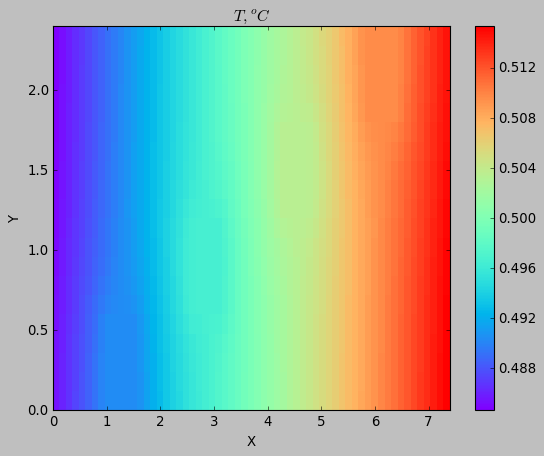

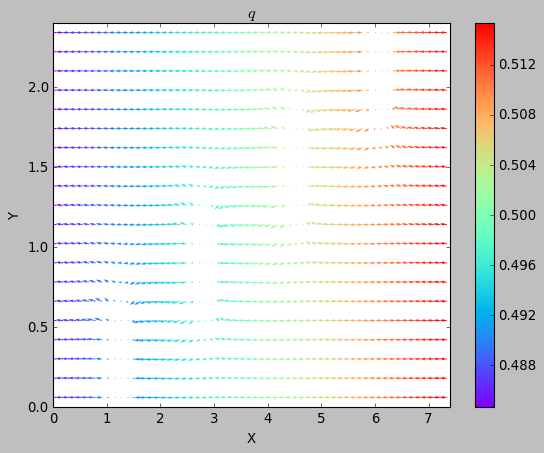

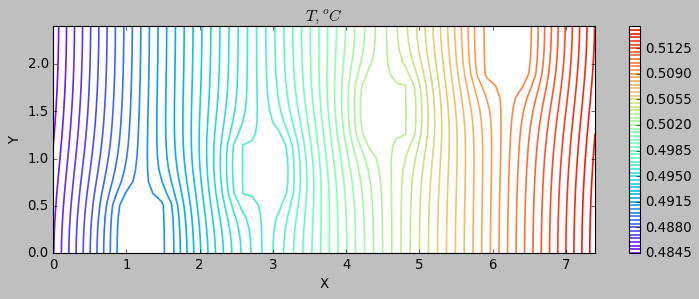

[[0.48546455 0.48606116 0.48667267 ... 0.51419867 0.51476788 0.51534309]
 [0.48545015 0.48604625 0.48665684 ... 0.51419275 0.51476188 0.51533706]
 [0.48542185 0.48601684 0.48662536 ... 0.51418086 0.51474984 0.51532496]
 ...
 [0.48467504 0.48525016 0.48581914 ... 0.51337464 0.51398316 0.51457815]
 [0.48466294 0.48523812 0.48580725 ... 0.51334316 0.51395375 0.51454985]
 [0.48465691 0.48523212 0.48580133 ... 0.51332733 0.51393884 0.51453545]]


In [2]:
#Био = 0.01 , d_1 = 1.0 , d_2 = 0.6
L_x,L_y,Number_x_slices,Number_y_slices,XP,YP,XFace,YFace,T,T_X_Y,q_left,q_right,Lambda_Eff = Calculate_Matrix(W_slices,delta_1[0],delta_2[0],lambda_1,lambda_2,Bio[0])
fig = plt.figure('fig1')
plt.pcolor(XFace, YFace, T_X_Y,cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("$T,^oC$")
plt.colorbar()
plt.xlim(0.0,L_x)
plt.ylim(0.0,L_y)
plt.show()
fig = plt.figure('fig3')
vgrad = np.gradient(T_X_Y,YP,XP)
vgradmod = np.sqrt(vgrad[0]**2 + vgrad[1]**2)
plt.quiver(XP,YP,-vgrad[1],-vgrad[0],T_X_Y,cmap = 'rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("$q$")
plt.colorbar()
plt.xlim(0.0,L_x)
plt.ylim(0.0,L_y)
plt.show()
fig = plt.figure('fig2',figsize=(L_x/L_y*90.0/25.4,90.0/25.4))
plt.contour(T_X_Y,Number_x_slices,cmap='rainbow',extent = (0.0,L_x,0.0,L_y),linewidths = 1.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("$T,^oC$")
plt.colorbar()
plt.xlim(0.0,L_x)
plt.ylim(0.0,L_y)
plt.show()
print(T_X_Y)

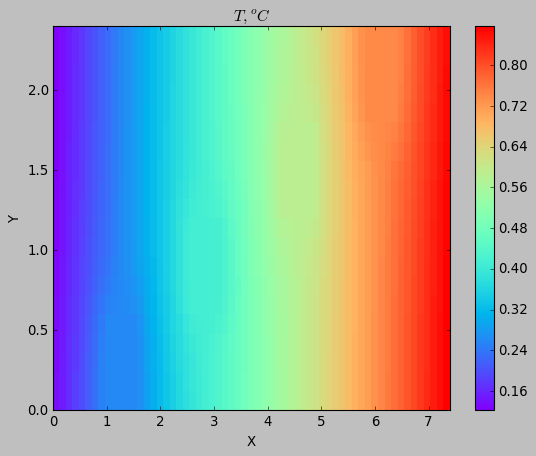

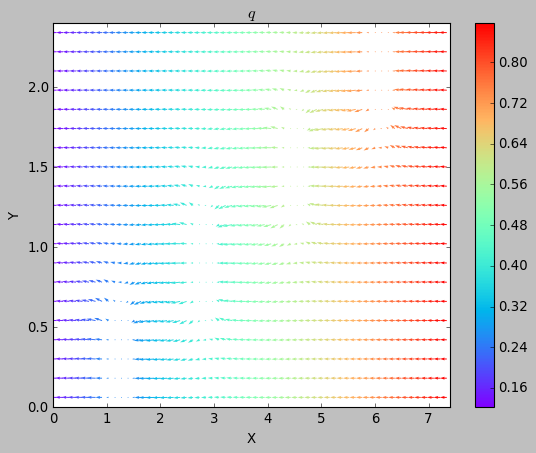

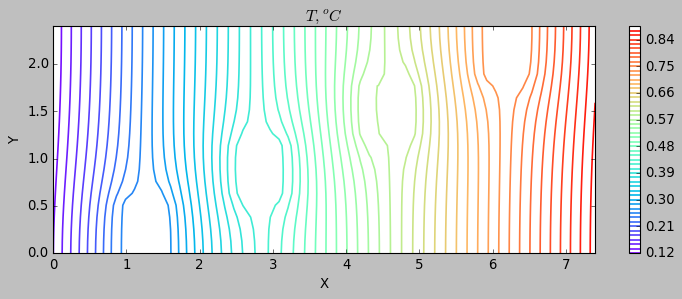

In [3]:
#Био = 1.0 , d_1 = 1.0 , d_2 = 0.6
L_x,L_y,Number_x_slices,Number_y_slices,XP,YP,XFace,YFace,T,T_X_Y,q_left,q_right,Lambda_Eff = Calculate_Matrix(W_slices,delta_1[0],delta_2[0],lambda_1,lambda_2,Bio[1])
fig = plt.figure('fig1')
plt.pcolor(XFace, YFace, T_X_Y,cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("$T,^oC$")
plt.colorbar()
plt.xlim(0.0,L_x)
plt.ylim(0.0,L_y)
plt.show()
fig = plt.figure('fig3')
vgrad = np.gradient(T_X_Y,YP,XP)
vgradmod = np.sqrt(vgrad[0]**2 + vgrad[1]**2)
plt.quiver(XP,YP,-vgrad[1],-vgrad[0],T_X_Y,cmap = 'rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("$q$")
plt.colorbar()
plt.xlim(0.0,L_x)
plt.ylim(0.0,L_y)
plt.show()
fig = plt.figure('fig2',figsize=(L_x/L_y*90.0/25.4,90.0/25.4))
plt.contour(T_X_Y,Number_x_slices,cmap='rainbow',extent = (0.0,L_x,0.0,L_y),linewidths = 1.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("$T,^oC$")
plt.colorbar()
plt.xlim(0.0,L_x)
plt.ylim(0.0,L_y)
plt.show()